In [1]:
knitr::opts_chunk$set(echo = TRUE)

This document is licensed under a
[Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).

The slide set referred to in this document is "GWAS 1".

This course is about **statistical/computational ideas and methods** that are used in
**genome-wide association studies (GWAS)**. (Note that on these notes 'GWAS' is both singular and plural while other texts may use 'GWASs' or 'GWASes' for plural.)
More generally, these same methods are useful
for analyzing large data sets of many other types, but, on this course,
we will approach these from the angle of GWAS.

A GWAS quantifies statistical association between genetic variation
and phenotypes. A **phenotype**, also called a **trait**,
can be any measured or observed property
of an individual. Examples of phenotypes are quantitative traits like
standing height or concentration of cholesterol particles in circulation, or
binary traits like diagnoses of multiple sclerosis or schizophrenia.

#### Why do we do GWAS? (slides 2-6)

We do GWAS because a statistical association between
a particular physical region of the
genome and the phenotype

* can point to **biological mechanisms** affecting the phenotype,
* can allow **prediction** of the phenotype from genomic information.

These results may further benefit

* **medicine** by leading to molecular or environmental interventions against harmful phenotypes,
* **biotechnology** by improving the ways we utilize microbes, plants or animals,
* **forensics** by more accurate identification of an individual from a DNA sample,
* biogeographic **ancestry inference** of individuals, populations and species,
* our understanding of the role of **natural selection** and other **evolutionary forces** in the living world.

The genome of an individual remain (nearly) constant throughout the individual's
lifetime. This is a truly remarkable property compared to, e.g., other molecular
sources of information (such as metabolomics, metagenomics, transcriptomics, proteomics or epigenomics)
or environmental factors that may vary widely across time.
Therefore, the genome seems an ideal starting point for scientific research:
it needs to be measured only once for an individual and there is no
*reverse causation* from the phenotype to genome
(with cancer as an important exception).

#### Ethical aspects

As with any powerful technique, the utilization of results from GWAS also raises
many new and difficult ethical questions
and the legislation of utilization of genome information is
under active development around the world.
For example, we need concrete answers to

* who can access an individual's genetic information
and for which purpose: individual himself/herself?, researchers?, medical professionals?, insurance companies?, employers?,
school system?, everyone?
* what kind of information should be returned back to an individual:
genetic risk for a disease for which some preventive measures exist vs. a disease
with no actionable measures known?,
genetic prediction of sensitive traits such as IQ?,
genetic ancestry or family information
that does not match prior expectations of the individual, for example,
due to false paternity?
* what kind of information, if any, should be returned to a relative of
a tested individual given that the relative may also have some of the same genetic variants?
* when is gene editing allowed: to cure severe disease?, to prevent a severe mutation
to be passed on to next generation?, to design the next generation to have some favorable genetic variants?

When working with human genome data, we should always keep it clear in mind
that there are such profound questions related to these data,
and that the data we handle will likely
turn out to be more powerful than most of us can imagine today.
Human genome data are never 'just data' but include highly personal information,
and they need to be handled with high respect and care.
Access to genetic data requires a written agreement
between the researcher and the data provider about how and for which purpose
the data can be used.

#### Contents of this course (slides 24-25)

The plan is to discuss the following topics (in varying level of detail):

1. What is a GWAS?

2. Statistics of GWAS (regression coefficients, P-values, statistical power, Bayes factors)

3. Genetic relatedness and population structure

4. Confounding and covariates in GWAS

5. Haplotypes, linkage disequilibrum, imputation, fine-mapping

6. Linear mixed models and heritability

7. Summary statistics and meta-analysis

8. Mendelian randomization

9. Success and critisism of GWAS

10. Human genetics research at [FIMM](https://www.fimm.fi/en/research/human-genomics-and-preventive-health-care)

## 1.1 Genetic variation (slides 7-12)

We all carry two nuclear genomes (i.e. genomes located in cell nucleus),
one inherited from each of our two parents.
Additionally, we have a small mitochondrial genome,
[assumed to be](http://www.pnas.org/content/early/2018/11/21/1810946115)
inherited exclusively
from the mother, but on this course the term 'genome' refers to the nuclear genome.

Human genome is 3.2 billion **nucleotides** (or **base pairs** or **DNA letters** A,C,G,T)
long sequence ([see yourgenome.org](https://www.yourgenome.org/facts/what-is-dna)),
that is divided into separate physical pieces called **chromosomes** ([see yourgenome.org](https://www.yourgenome.org/facts/what-is-a-chromosome)).
There are 22 **autosomal** (non-sex related) chromosomes
and two **sex chromosomes** (X chromosome and Y chromosome).
Normally, humans have two copies of each
autosome and individuals with one copy of X and one of Y are males
whereas individuals who have two copies of X are females.
Abnormal number of chromosomes (called **aneuploidies**) typically
cause severe consequences
or an early death if present in all cells of an individual.
The most common non-lethal exception is the Down syndrome (3 copies of chr 21).
**Mosaicism**, where some cells have abnormal chromosome numbers also exist
and are often present in cancer cells.

There are three types of pairings that come up when we analyse genomes.

* First, the DNA is most of the time
a double-stranded molecule whose two strands (i.e. the two DNA molecules) are glued together
by the chemical base pairings A-T and C-G.
This base pairing is a key to the copying mechanism of the DNA that is needed
before any cell division ([see yourgenome.org](https://www.yourgenome.org/video/dna-replication)) and
the DNA molecules that are connected through base pairing
have the exact same information, just written in the reverse letters
i.e. A <-> T and C <-> G.
To make distinction between the two DNA molecules,
it has been agreed that one of the two DNA strands is called
the **forward strand** (or **positive strand**)
and the other the **reverse strand** (or **negative strand**).
Thus, e.g., when + strand contains base A, the corresponding base on - strand is T and vice versa.

* Second, the two **homologous** choromosomes of an individual
(e.g. paternal chr 13 with maternal chr 13, or in a male, maternal X and paternal Y)
can be thought of as a pair.
Thus, we say that the human genome consists
of 22 autosomes + X + Y, but each individual
has two copies of each homologous chromosome,
so has 46 unique chromosomes that are divided into 23 pairs of homologous chromosomes.

* Third, before any **cell division** each of the 46 unique chromosomes of an individual
copies itself and the two copies (called sister chromatids)
are paired with each other physically to make
an X-like shape that is often used to show chromosomes in pictures.
Such picture actually has 92 chromosomes since each unique chromosome
is duplicated in it (but we typically say that there are 46 replicated chromosomes rather than
that there are 92 chromosomes).
This pairing after copying is important in cell division so that the resulting cells
will get the correct set of choromosomes. In mitosis (ordinary cell division),
each of the two new cells has one set of the 46 unique chromosomes.
In meiosis, the gametes (sperm and eggs) are formed to have
only one copy of each homologous chromosome and thus have 23 unique chromosomes.
During meiosis, the process of **recombination** shuffles the homologous
copies of the paternal and maternal chromosomes in such a way that each of the
offspring's chromosomes will be a mixture of its grandparental chromosome segments.

Terms

* **Gene.**
The most obvious way how genetic variation can affect phenotypes is through
variation in how **genes** function. Genes are segements of DNA that code for proteins
([see yourgenome.org](https://www.yourgenome.org/video/from-dna-to-protein)) and variation
in the physical structure of the protein or in the time and place where the protein is made
can have phenotypic consequences. Therefore, we are very
interested in how genetic variation can affect the function of genes,
and a lot of this is still unknown.
Protein coding genes cover less than 2% of the whole human genome,
but the remaining 98% affects the regulation of genes in many ways.

* **Locus (pl. loci).**
A continuous region of the genome is called a locus (plural loci).
It can be of any size (e.g. a single nucleotide site of length 1 bp or
a region of 10 milion base pairs, 10 Mbp).
**GWAS loci** are regions that include a clear statistical association
with the phenotype of interest.

### 1.1.1 Genetic variants
At any one position of the genome (e.g. nucleotide site at position 13,475,383 of chromosome 1,
denoted by chr1:13,475,383)
variation can exist between the genomes in the population. For example,
my paternal chromosome can have a base A and maternal chromosome can have a base G
(on the +strand of the DNA) at that position. (slide 10)
Such a one-nucleotide variation is called a **single-nucleotide variant (SNV)** and
the two versions are called **alleles**. So in the example case,
I would be carrying both an allele A and an allele G at that SNV, whereas
you might be carrying two copies of allele A at the same SNV.
My **genotype** would be AG and yours AA.
An individual having different alleles on his/her two genomes is **heterozygous**
at that locus, and an individual having two copies of the same allele is
**homozygous** at that locus.
If neither of the alleles
is very rare in the population, say, the **minor allele frequency (MAF)**
is > 1% in the population,
the variant is called a polymorphism, **single-nucleotide polymorphism (SNP)**.
There are over 10 million SNPs in the human genome.
More complex genetic variation (slide 9) include structural variation (SV) such as
copy number variants (CNVs), that include duplications or deletions of genomic regions,
or rearrangements of the genome, such as inversions or translocations of DNA segments
([see yourgenome.org](https://www.yourgenome.org/facts/what-types-of-mutation-are-there)).

A predefined set of 500,000 - 1,000,000
SNPs can be measured reliably and fairly cheaply (< 50 euros/sample) by DNA microarrays,
which has been the single most important factor making GWAS possible (slide 11; [Illustration](https://www.mun.ca/biology/scarr/DNA_Chips.html)).
On this course, we consider SNPs as the canonical type of genetic variation.
Typically, the SNPs are **biallelic**, i.e., there are only two alleles present in the population
and this is what we assume in the following.
In principle, however, all four possible alleles of a SNP
could be present in the population.

**Ambiguous SNPs.** If the two alleles of a SNP are either C,G or A,T we call the SNP
*ambiguous* because the strand information must be available (and correct)
in order to make sense of the genotypes at this SNP.
This is because allele C on + strand would be called allele G on - strand
and if this SNP is reported with respect to different strands in different
studies, the results get mixed up.
The same problem does not happen with the other SNPs, e.g.,
a SNP with alleles A,C, because
this SNP contains alleles T,G on the opposite strand
and we could unambiguously match A to T and C to G between the studies.
Note that we can resolve most ambiguous SNPs reliably based on the allele frequencies
as long as the minor allele frequency is not close to 50%.
If we are combining several studies, we should always start by
plotting the allele frequencies between the studies
after the alleles should be matching each other in order to see that the frequencies
indeed match across the studies.

#### Some catalogues of genetic variation
A large part of the genetics research over the last 30 years have been driven by
international projects aiming to catalogue genetic variation in public domain.

- [The Human Genome Project](https://www.yourgenome.org/stories/what-was-the-human-genome-project-for)
1990-2003 established a first draft of a human genome sequence.

- [The HapMap project](https://www.genome.gov/10001688/international-hapmap-project/)
2002-2009 studied the correlation structure of the common SNPs.

- [The 1000 Genomes project](http://www.internationalgenome.org/about) 2008-2015,
expanded HapMap to genome sequence information across the globe and
currently remains a widely-used reference for global allele frequency information.
1000G project was able to characterize well common variation in different *populations*, but
missed many rare variants of single individuals
because the costs of very accurate sequencing were too high.
The tremendous impact of the 1000G project stems from the fact that everyone can download
the individual level genome data of the 1000G samples from the project's website
and use it in their own research.


- [Exome Aggregation Consortium (ExAC)](http://exac.broadinstitute.org/) 2014-2016
concentrated only on the protein coding
parts of the genome, so called *exons*, that make up less than 2% of the genome
and was able to provide accurate sequence data for the exomes of over 60,000 individuals.
This effort has been particularly important for medical interpretation of rare
variants seen in clinics that diagnose patients with severe disease.
ExAC provides summary level information through browser and downloads
but individual level data cannot be downloaded.

- [Genome Aggregation Database (gnomAD)](http://gnomad.broadinstitute.org/)
is expanding the ExAC database and
also includes additional whole genome sequencing information.
It is the current state-of-the-art among the public genome variation databases.

### 1.1.2 Genotypes and Hardy-Weinberg equilibrium

Let's consider one SNP in the population. The SNP has two alleles that could be called
by their nucleotides, but with quantitative analyses in mind,
we name the alleles in such a way that the **minor allele**
(the one that is less common in the population)
is called allele 1 and the **major allele** (the one that is more common in the population)
is called allele 0.
(There is no general rule that GWAS results are reported as
allele 1 corresponding to the minor allele, and even if there was,
the minor allele could differ between two data sets/populations, so consistency across studies
needs always to be checked.)
Let's denote the **minor allele frequency (MAF)** by $f$.
Since each individual has two copies of the genome, there are individuals with
three possible genetic types (called **genotypes**) at this SNP.
We denote each genotype by the number of copies of allele 1 that
the genotype contains (i.e. genotype can be 0, 1 or 2).
If we assume that, at this SNP, the two alleles in one individual are sampled at random
from the population, then the genotype frequencies in the population follow
the binomial distribution $\textrm{Bin}(2,f)$:

genotype | expected frequency from Bin(2,f)
-|-
0 | $(1-f)^2$
1 | $2\,f(1-f)$
2 | $f^2$

These frequencies are called the **Hardy-Weinberg equilibrium** (HWE) genotype frequencies
(or HW proportions) and
they define the theoretical equilibrium genotype frequencies given the value of $f$
in an ideal *randomly mating* population
without *selection*, *migration*, or *genetic drift*
(=statistical fluctuations due to finite population size).
In practice, most variants in human populations do approximately follow HWE.
Clear deviations from HWE could point to, for example,
recent *population structure* (e.g. two populations have admixed),
*assortative mating* (individuals tend to mate with partners of their kind)
or natural selection (e.g. genotype 1 is very advantageous whereas
genotype 2 is lethal and hence completely absent from the population).
On the other hand, technical problems in *genotype calling* (i.e. in determining genotypes
from the intensity measures from a genotyping chip) can also cause deviations
from HWE, either because of bad quality data
or because the variation is not a biallelic SNP and has more than two alleles
(slide 12). Therefore,
often variants which do not follow HW frequencies are excluded from many GWAS analyses
as part of the [*quality control* (QC) procedure](https://www.nature.com/articles/nprot.2010.116).

**Testing HWE.** To test for (deviations from) HWE a 1-df [chi-square test](https://en.wikipedia.org/wiki/Hardy%E2%80%93Weinberg_principle#Significance_tests_for_deviation) can be used
where the expected counts are derived under HWE given the allele frequencies.

Suppose that we have observed genotype counts $n_0,n_1,n_2$ for genotypes
0,1 and 2, respectively, and $N = n_0 + n_1 + n_2.$ Our estimate for
population frequency of allele 1 is $\widehat{f} = (n_1+2\,n_2)/(2\,N)$,
and the expected genotype counts under HWE are $h_0 = N(1-\widehat{f})^2$,
$h_1 = 2 N \widehat{f}(1-\widehat{f})$ and $h_2 = N \widehat{f}^2$.
The test statistic measures the deviation between the observed counts and the
expected counts:
$$ t_{HWE} = \sum_{i=0}^2 \frac{(n_i-h_i)^2}{h_i}.$$
If HWE holds, then $t_{HWE}$ follows approximately a
Chi-square distribution with 1 degree of freedom,
which is used for deriving a P-value.
If theoretical chi-square distribution is used,
the test is asymptotic and hence not necessarily valid for small sample size
or very rare variants, and a test statistic distribution
based on permutations should be used, e.g., by R
package [HardyWeinberg](https://cran.r-project.org/web/packages/HardyWeinberg/index.html).

**Example 1.1.**
Look up the SNP rs429358 from the Ensmbl browser <https://www.ensembl.org/>.
Choose Human and type 'rs429358'; you'll see the variant's chr (19), position
(44,908,684 in the version GRCh38 of the Human Genome coordinates mentioned on top left)
and the two alleles, T and C, of which C is predicted to be the 'ancestral' that is, the
older allele, and C is also the minor allele with average MAF of 15% across human populations.
Next click 'Population Genetics' to see allele and genotype frequencies in different human populations. (Familiarize with given populations by hovering mouse above them.)
Scrolling down, in the 1000 Genomes project Phase 3 (1000G) Finnish data,
the minor allele C has frequency $37/198 \approx 18.7\%$ and
the observed genotype counts are 66 (TT), 29 (TC) and 4 (CC) individuals.
Let's use these values to visualize the genotype distribution
and apply the standard test for HWE.

[1] 0.1868687

obs,0.6666667,0.2929293,0.04040404
hwe,0.6611825,0.3038976,0.03491991


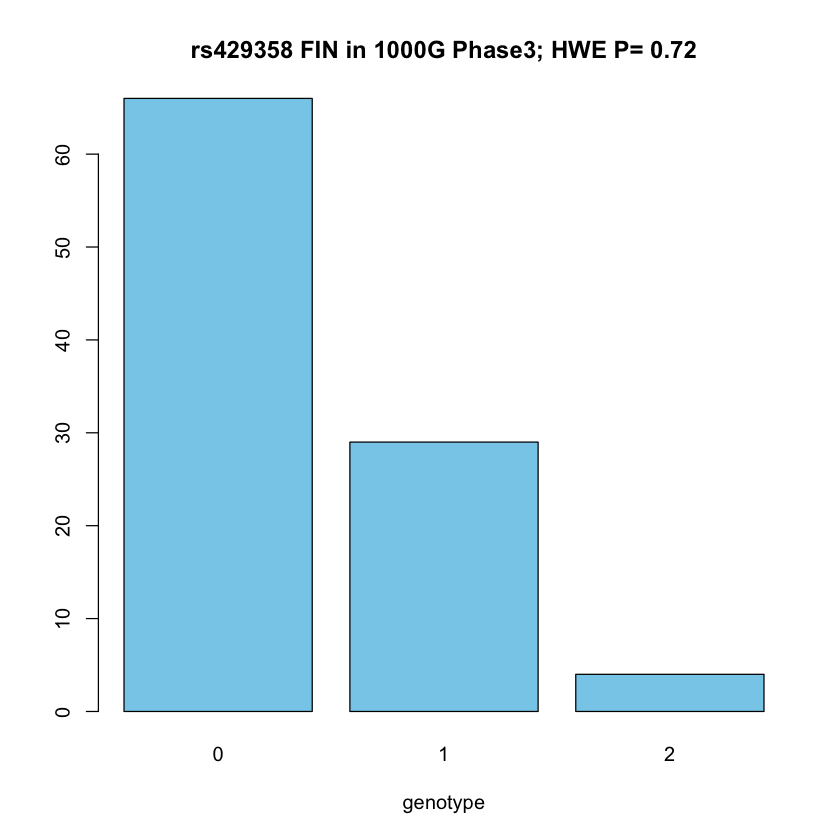

In [1]:
geno = c(66,29,4)
n = sum(geno) #number of individuals
f = sum(geno*c(0,1,2))/(2*n) #(66*0 + 29*1 + 4*2) / (2*(66+29+4))
f #MAF
hwe.prop = c((1-f)^2, 2*f*(1-f), f^2) #these would be the genotype freqs under HWE
rbind(obs = geno/n, hwe = hwe.prop) #print the observed genotype freqs and the HWE.
#For testing HWE we use chi-square test even though counts are quite small in last cell:
hwe.test = sum((geno - n*hwe.prop)^2/(n*hwe.prop)) #HWE test statistic
hwe.p = pchisq(hwe.test, df = 1, lower = FALSE) #P-value from the test
barplot(geno, main = paste("rs429358 FIN in 1000G Phase3; HWE P=",signif(hwe.p,3)),
        names = c(0,1,2), xlab = "genotype", col = "skyblue")

To get familiar with how to generate realistic genotype data,
let's also make example
genotype data for $n = 1000$ additional
Finns at this variant, both by sampling from the genotype frequencies
and by sampling from the allele frequencies (assuming HWE).
Since this variant seems to follow HWE, we do not expect qualitative differences
between the two simulation approaches.

In [3]:
set.seed(19) #setting seed guarantees the same simulation results every time this code is run
n = 1000
sample.from.geno = sample(c(0,1,2), prob = geno, size = n, replace = T) #sample from genotype frequencies
# replace = TRUE means sampling with replacement, that is,
# each genotype can be sampled many times, always with the same probabilities given in 'prob'
tab = table(sample.from.geno) #table counts how many times each value is present
counts.from.geno = rep(0,3) #How many carriers of each genotype
counts.from.geno[ 1 + as.numeric( names(tab) )] = as.numeric(tab) #works even if some count is 0

#To sample from HWE frequencies, we could use:
#sample.from.hwe = sample(c(0,1,2), prob = c((1-f)^2, 2*f*(1-f), f^2), size = n, replace = T)
#but a simpler way is to sample n genotypes directly from Bin(2,f) distribution:
sample.from.hwe = rbinom(n, size = 2, p = f)
counts.from.hwe = rep(0,3) #Let's count how many carriers of each genotype
for(ii in 0:2){ #this is another way to do the counting compared to table() above
  counts.from.hwe[ii+1] = sum(sample.from.hwe == ii)}

rbind(geno = counts.from.geno/n, hwe = counts.from.hwe/n)

barplot(cbind(counts.from.geno/n, counts.from.hwe/n),
        names = c("geno","HWE"), beside = F, horiz = T)

They *look* pretty similar but
to do statistical inference we should also quantify the
uncertainty of the estimates (e.g. by 95% intervals).
For small counts, a Bayesian credible interval  called
*Jeffreys interval* is preferred
over the standard 95% confidence interval,
whereas for larger counts the two approaches agree.
Details of the two approaches are [here](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval).

Let's make Jeffreys intervals for the estimates of each genotype frequency
in both of the data sets.

In [4]:
interval.from.geno = matrix(NA, ncol = 2, nrow = 3) #empty matrix
interval.from.hwe = matrix(NA, ncol = 2, nrow = 3)
for(ii in 1:3){ #find intervals while looping over 3 genotypes
  interval.from.geno[ii,] = qbeta(c(0.025,0.975), counts.from.geno[ii]+0.5, n-counts.from.geno[ii]+0.5)
  interval.from.hwe[ii,] = qbeta(c(0.025,0.975), counts.from.hwe[ii]+0.5, n-counts.from.hwe[ii]+0.5)
}

Now we can print out the observed genotype frequency (1st col) and its 95% interval (2nd and 3rd cols)
for both data sets and compare whether the estimates seem similar
given the uncertainty described by the intervals:

In [5]:
cbind(geno.est = counts.from.geno/n,interval.from.geno,
      hwe.est = counts.from.hwe/n,interval.from.hwe )

All estimates are within other data set's 95% Jeffreys credible interval and
we have no reason to suspect frequency differences between the two data sets.

A standard two-sample chi-square test can also be carried out to
quantify the frequency difference as a P-value:

In [6]:
chisq.test(rbind(counts.from.geno,counts.from.hwe)) #tests whether rows have same distribution

Unsurprisingly,
this does not indicate any frequency difference between the two data sets
as P-value is large (0.5361).
We'll talk more about interpretation of P-values later.

## 1.2 What is a genome-wide association study?

Let's look at some recent examples of GWAS.
Two main types of GWAS are studying quantitative traits or disease phenotypes.

**Example 1.2. QT-GWAS (slides 14-18)** [GWAS on body-mass index (BMI)](https://www.nature.com/articles/nature14177) by Locke et al. (2015)
combined data of 339,000 individuals from 125 studies around
the world to study the association of SNPs and BMI.
It highlighted 97 regions of the genome
with convincing statistical association with BMI.
Pathway analyses provided support for a role of the central nervous system in
obesity susceptibility and implicated new genes and pathways related to
synaptic function, glutamate signalling, insulin secretion/action,
energy metabolism, lipid biology and adipogenesis.

**Example 1.3. Disease GWAS (slides 20-22)** [GWAS on migraine](https://www.nature.com/articles/ng.3598) by Gormley et al. (2016)
combined genetic data on 60,000 cases (individuals with migraine)
and 315,000 controls (individuals with no known migraine) originating from
22 studies. Genetic data was available on millions of
genetic variants. At each variant, the genotype distribution between cases and controls were
compared. 38 regions of the genome showed a convincing statistical association with migraine.
Downstream analyses combined the genes into pathways and cell types
and highlighted enrichment of signals near genes that are active in vascular system.

Terms:

* **Monogenic** phenotype is determined by a single gene/locus.
* **Oligogenic** phenotype is influenced by a handful of genes/loci.
* **Polygenic** phenotype is influenced by many genes/loci.
* **Complex trait** is a (quantitative) phenotype that is not monogenic. Typically polygenic and also influenced by many environmental factors.
* **Common disease** is a disease/condition that is common in the population (say, prevalence of 0.1% or more). Examples:  MS-disease (prevalence in the order of 0.1%), schizophrenia (~1%) or Type 2 diabetes (~10%).
* **Common variant** has frequency of at least 1% (also 5% is used as the threshold).
* **Low-frequency variant** has frequency of at least 0.1% and lower than a common variant.
* **Rare variant** has frequency lower than a low-frequency variant.

GWAS have shown us that, very generally,
complex traits and common diseases are highly polygenic,
and many common variants with only small effects influence these phenotypes.
We don't yet know which are the exact causal variants for each phenotype because
of the correlation structure among genetic variants
(this is the fine-mapping problem we'll look later).
We also don't yet know very accurately
how rare variants affect each phenotype because that requires very large
sample sizes interrogated by *genome sequencing* techniques, not only by SNP arrays.

### 1.2.1 Quantitative traits
Let's mimick the data we see on slide 3.
The phenotype is LDL-cholesterol level and we assume that the trait distributions
of individuals with 0, 1 or 2 copies of allele T at SNP rs11591147
are Normal distributions with SD=1 and with means of
0.02, -0.40 and -2.00, respectively.
Allele T frequency is 4% in Finland.
Let's simulate $n=10,000$ individuals and boxplot them by genotype.

In [7]:
n = 10000
f = 0.04
mu = c(0.02, -0.40, -2.00) #mean of each genotype
sigma = c(1, 1, 1) #SD of each genotype

x = rbinom(n, size = 2, p = f) #genotypes for 'n' individuals assuming HWE
table(x)/n #(always check that simulated data is ok before starting to work with it!)

y = rep(NA,n) #make empty phenotype vector
for(ii in 0:2){ #go through each genotype group: 0, 1, 2.
  y[x == ii] = rnorm(sum(x == ii), mu[1+ii], sigma[1+ii]) } #generate trait for group ii

boxplot(y ~ x, main = "Simulated rs11591147 in Finns", ylab = "LDL",
        xlab = "Copies of T", col = "limegreen")

We see that the phenotype varies with genotype in such a way that each additional
copy of allele T decreases the level of LDL.

##### Additive model
The simplest way to analyze these data statistically is to
use an **additive model**, that makes the assumption that the means of the groups
depend additively on the number of allele 1 in the genotype, and
that the SDs of the genotype groups are constant.
Thus, we fit a linear model $y = \mu + x \beta + \varepsilon$, where
$y$ is the phenotype, $x$ is the genotype (0,1 or 2) and parameters to be estimated are

 * $\mu$, the mean of genotype 0 and
 * $\beta$, the effect of each copy of allele 1 on the mean phenotype.

The error terms $\varepsilon$
are assumed to have an identical Normal distribution $N(0,\sigma^2)$ where
$\sigma^2$ is not known and will be estimated from the data.
Let's fit this linear model in R using `lm()`.

In [8]:
lm.fit = lm(y ~ x)
summary(lm.fit)

The `summary(lm.fit)` command produced

* parameter estimates (or Coefficients) $\widehat{\mu}$ and $\widehat{\beta}$,
* their standard errors (SE) (estimates for square root of the sampling variance of the parameter estimates),
* t-statistic (estimate/SE) and
* P-value under the null hypothesis that the parameter is 0 and errors are uncorrelated and have  distribution $N(0,\sigma^2)$.

Under the assumptions of linear model,
sampling distribution of t-statistic is $t$-distribution and hence q% confidence
intervals are determined as $\widehat{\beta}\pm a\times \textrm{SE}$,
where $a$ is the q/2% quantile of $t$-distribution with $n-2$ degrees of freedom.
When $\sigma^2$ is known, the $t$-distribution is replaced by a Gaussian,
and same is approximately true when $n$ becomes large,
even if estimate $\widehat{\sigma^2}$ is used in computing SE.
In these cases, we often talk about z-statistic instead of t-statistic.
In GWAS analyses, we typically have thousands of samples
and use z-scores and the Normal approximation by default.

The last paragraph in the output tells about the full model fit.
We can measure how much variation in $y$ is left unexplained by the model
by computing **residual sum of squares** (RSS):
$$
RSS = \sum_{i=1}^n \left(y_i - \widehat{\mu} - x_{i} \widehat{\beta}\right)^2
$$
$R^2$ is the proportion of variance explained by the linear model,
i.e., $R^2 = 1-\frac{RSS}{n-1} / \widehat{\textrm{Var}}(y)$.
Adjusted version penalizes for additional predictors and is defined here
as $R_{adj}^2 = 1-\frac{RSS}{n-2} / \widehat{\textrm{Var}}(y)$.
Note that if there is only the
intercept parameter $\mu$ in the model,
then $R^2=R_{adj}^2=0$, and if the model explains data perfectly ($RSS=0$),
then $R^2=R_{adj}^2=1$.
In other cases $R^2$ values are between 0 and 1
and larger values mean more variance explained by the model.

However, $R^2$ should not be the only value used to judge how suitable
the model is for the data. One should also plot the data and the model
fit in different ways to assess this question. (Although, of course not
for all variants in GWAS, but for the most interesting ones.)
For this simple linear model, a scatter plot and a regression line is a good way to
assess whether there seem to be deviations from the additivity assumption.
Additionally, the differences in residual variation between the groups
could indicate interaction effecs between the genetic variant and
some other genetic or environmental variable.

In [9]:
plot( x + runif(n, -0.05, 0.05), y, xlab = "genotype", ylab = "LDL", xaxt = "n",
      pch = 3, cex = 0.5, col = "gray")
#runif() adds some jitter to x so that all points are not on top of each other
axis(1, at = 0:2, labels = 0:2)
points(0:2, c(mean(y[x==0]), mean(y[x==1]), mean(y[x==2])), col = "red", pch = "X", cex = 1.3)
abline(lm.fit, col = "orange", lwd = 2)
legend("topright", pch = "X", legend ="group means", col = "red")

**Conclusion**: We see a statistically highly significant association between the
genotype and phenotype where a copy of allele T decreases LDL levels by 0.45 units.
This variant explains about
1.5% of the variation in LDL-cholesterol levels. We also see that individuals homozygous
for allele T (genotype 2) have on average lower levels of LDL than the model predicts,
which indicates a deviation from the additivity assumption.
Let's next fit a full 2-parameter model to quantify this deviation.

#### Full model
Let's add a new parameter $\gamma$ to the model that describes the residual effect
for group 2 after the additive effect is accounted for.
The model is $y = \mu + x\beta + z\gamma + \varepsilon,$
where $z$ is indicator of genotype 2, i.e., $z_i=1$ if individual $i$ has genotype 2
and otherwise $z_i=0$.
This is the full model
where each genotype group has its own mean (genotype 0: $\mu$;
genotype 1: $\mu + \beta$
and genotype 2: $\mu + 2\beta + \gamma$).

In [10]:
z = as.numeric( x == 2 ) #z is indicator for genotype group 2
lm.full = lm( y ~ x + z )
summary(lm.full)

It seems that also the new variable is useful (large effect and small P-value).
Now the interpretation of coefficients is that genotype 1 has avg. phenotype
of -0.40 and genotype 2 has avg. phenotype -0.398*2-1.206 = -2.00.

Note also that the full model above gives the same model fit and is simply
a different parameterization of
the linear regression that treats the genotype as a factor with three levels.

In [11]:
lm.full2 = lm( y ~ as.factor(x) )
summary(lm.full2)

We should use this latter parameterisation of the full model if we are interested
in SE of the genetic effect of genotype 2, because that information is not
given by the first parameterisation of the full model. If we instead are
interested to quantify how much the data show deviation from the additivity
then the first parameterisation is the most suitable.

(The latter parameterisation is also the same model as the
traditional Analysis of Variance ANOVA but
we are working within the regression model framework for reasons that become clear
once we get to confounders and covariates.)

All these models make the same assumption that SD is constant across the
genotype groups.

#### Current approach to quantitative phenotypes in GWAS

Almost all GWAS analyze quantitative traits using the additive model, i.e.,
a linear regression model with a single parameter for genetic effect.
The full model is typically only used for a small group of interesting variants
identified by the additive model
to check them manually for possible deviations from the additive effects.
The main reason for this is that the additive model is usually almost as
powerful to find associations as the full model even when deviations from additivity are present
in the data, since typically one of the genotype groups is much smaller than the other two and
hence does not affect much the statistical model fit.
Additionally, our current understanding is
that most associations follow well the additive model and
the additive model has more power than the full model, for these cases.
(But note that our current understanding may be biased in favor of
the additive model since we do not usually look very carefully
for non-additive effects.)
It would seem useful to run both the additive and full model in GWAS,
but this is often not
done because there are millions of variants to be analyzed
and hence there are a lot of work and output
already when only the simplest model is applied.

**Quantile normalisation (QN).**
Often in large GWAS the quantitative phenotype is forced to follow a
Normal distribution by quantile normalisation (also *inverse-Normal transfromation*).
This way the effect of phenotypic outliers is diminished while keeping the
ranking of the trait values constant.
This also harmonizes the trait distributions across multiple cohorts by
forcing them to look similar.

To apply QN to a set of $n$ trait values,
we first regress out from the trait values the central covariates
(such as sex and age) using a linear model.
Then we order the residuals of the regression in ascending order
$\widehat{r}_{(1)}\leq \ldots \leq \widehat{r}_{(n)}$.
Now the QN'ed trait values for the sample is taken from
the inverse of the cumulative distribution function of the Normal distribution
at $n$ equally spaced values between 0 and 1, and the resulting values
$q_1 \leq \ldots \leq q_n$ are matched to the individuals so that the value
$q_i$ becomes the trait value for individual who corresponds to residual
$\widehat{r}_{(i)}$. Advantage of QN is robustness to outliers and to systematic
differences in measurements between studies. A disadvantage is that we
lose some information of the phenotype distribution, which could be useful
if it was modeled properly.

Let's do QN for 100 males and 100 females where the phenotype
in males follows $2+\textrm{Gamma}(\textrm{shape}=1.5,\textrm{scale}=1.5)$ and
in females $6+\textrm{Gamma}(\textrm{shape}=1.5,\textrm{scale}=1.5)$.

In [12]:
n = 200 #males + females
fem = rep( c(0,1), each = n/2) #who is female
y = 2 + rgamma(n, shape = 1.5, scale = 1.5) #males have shift of 2
y[fem == 1] = 4 + y[fem == 1] #females have shift of 6 = 2 + 4
hist(y, breaks = 30, col = "khaki") #shows some outliers compared to mixture of 2 Normals

#regress out sex and take residuals
lm.fit = lm(y ~ fem)
r = residuals(lm.fit)

#find QN'ed trait values from qnorm = inverse of cumulative distribution of Normal
inv.normalise <- function(x) { #this would also tolerate NAs
  return( qnorm( (rank(x, na.last = "keep") - 0.5) / sum(!is.na(x))))}
q = inv.normalise(r)
#Let's plot y and q (after scaling to mean=0, var=1)
par(mfrow = c(1,2))
plot(density(scale(y)), col = "black", lwd = 2, xlim = c(-4,4), ylim = c(0,0.5),
     xlab = "trait", main = "" )
lines(density(scale(q)), col = "darkgreen", lwd = 2)
plot(y, q, col = c("cyan","gold")[1+fem])
legend("bottomright", col = c("cyan","gold"), pch = 1, leg = c("male","female") )

We see that (right plot) the outliers on the original scale are still
the most extreme values in QN-scale on y-axis,
but they are now close to the other values and not anymore outliers.
The QN'ed trait, obviously, looks perfectly Normal (left plot)
while in the original trait we see outliers on right tail.
We also see
the effect of sex as the two modal distribution of $y$,
which was evened out by the regression step **before** QN was applied.

### 1.2.2 Binary phenotypes

How do we look for the association between a genotype and a binary disease status?
Here the phenotype is 0-1 indicator whether an individual is a **case** (y=1; has the disease)
or a **control** (y=0; does not have a disease).
If we take a practical approach, we could just apply the linear regression model
to binary outcome variable but it is not conceptually satisying
because the error terms cannot be assumed normally distributed.
Hence we will use a generalized linear regression model called **logistic regression**.
To derive the model, let's first define the effect size parameter for binary outcomes.

#### Relative risk and odds ratio

To measure whether a genotype affects disease status, we consider the
**relative risk** (RR) parameter for genotype 1
$$\lambda_1 = \frac{\textrm{Pr}(Y=1|X=1)}{\textrm{Pr}(Y=1|X=0)}.$$
Thus $\lambda_1$ tells how many times larger the risk of getting the disease is
for individuals with genotype 1 compared to individuals with genotype 0.
If

 * $\lambda_1 = 1$, there is no association to disease,
 * $\lambda_1 > 1$, genotype 1 confers risk to disease,
 * $\lambda_1 < 1$, genotype 1 confers protection to disease.

Similarly we define relative risk $\lambda_2$ as the factor by which genotype 2
multiplies the disease risk of genotype 0.

Relative risk is a simple to define, but it turns out not to be very
easy to estimate in the regression setting, particularly in the typical GWAS setting.
However, if we modify the parameter slightly from comparing risks to comparing odds,
we will get a measure that can be estimated in practice.
The odds corresponding to a probability value $p$
are $p/(1-p)$, i.e. they tell how many times as probable the event is to occur than
it is to not occur. If probability of a disease is 50%, then the odds of disease are 1,
if $p=1\%$ then odds are $1/99 = 0.0101$ and if $p=99\%$ then odds are 99.
Just like with RR we measured the *relative* increase in risk between two genotypes,
with odds we also use relative odds, also known as **odds ratio**, between genotypes.
So the odds ratio for genotype 1 is
$$\textrm{OR}_1 = \frac{\textrm{Pr}(Y=1|X=1)}{\textrm{Pr}(Y=0|X=1)} :  \frac{\textrm{Pr}(Y=1|X=0)}{\textrm{Pr}(Y=0|X=0)} =
\frac{\textrm{Pr}(Y=1|X=1) \textrm{Pr}(Y=0|X=0)}{\textrm{Pr}(Y=1|X=0)\textrm{Pr}(Y=0|X=1)}.$$
By Bayes formula we
can swap the roles of $Y$ and $X$ in the above formula, e.g., by writing
$\textrm{Pr}(Y=1|X=1) = \textrm{Pr}(X=1|Y=1) \textrm{Pr}(Y=1) / \textrm{Pr}(X=1)$.
By applying this to all 4 terms, we get
$$\textrm{OR}_1 = \frac{\textrm{Pr}(X=1|Y=1) \textrm{Pr}(Y=1) \textrm{Pr}(X=0)
\textrm{Pr}(X=0|Y=0) \textrm{Pr}(Y=0) \textrm{Pr}(X=1)} {\textrm{Pr}(X=0|Y=1) \textrm{Pr}(Y=1)\textrm{Pr}(X=1)
\textrm{Pr}(X=1|Y=0) \textrm{Pr}(Y=0) \textrm{Pr}(X=0)} =
\frac{\textrm{Pr}(X=1|Y=1)
\textrm{Pr}(X=0|Y=0) } {\textrm{Pr}(X=0|Y=1)
\textrm{Pr}(X=1|Y=0) }.$$
This shows that we can estimate our target odds ratio for the disease between
different genotypes
equally well by collecting individuals based on disease status and observing
their genotype distributions. This is the important property why odds ratios
are possible to measure in a typical disease GWAS that collects individuals
by disease status and then measures the genotypes.

**Example 1.4. OR and risk.**
Suppose that we know that there is a strong risk variant for Alzheimer's disease (AD)
with OR=3.0 (for one copy of the risk allele). Suppose that non-carriers of the
risk allele have a lifetime risk of 15% of AD. How large is the lifetime risk
for carriers of one or two copies of the risk variant?

Let $p_0=0.15$ be the risk in non-carriers. We know that odds of carriers of one copy
are $p_1/(1-p_1) = 3.0\cdot p_0/(1-p_0) = 3.0\cdot 0.15/0.85 = 0.5294$. Hence
the risk is $p_1 = 0.5294/(1+0.5294) = 0.346$. That is, 35%.

For carriers of two copies,
$p_2/(1-p_2) = 3.0\cdot p_1/(1-p_1) = 3.0\cdot 0.5294 = 1.5882$ and
$p_2 = 1.5882 / (1 + 1.5882) = 0.61363$. That is, 61%.

#### Inference for OR based on counts
In practice, GWAS analyses for disease studies are done using regression models since
they have a possibility to account for confounding covariates.
However, sometimes it is also useful to be able to quickly estimate OR parameters
and their uncertainty using count data without access to regression models.
But remember that such estimates cannot be adjusted for covariates
and therefore can be biased by confounding factors.

Suppose we have observed the following genotype counts:

group | genotype 0 | genotype 1 | genotype 2
-|-|-|-
cases | $S_0$ | $S_1$ | $S_2$
controls | $R_0$ | $R_1$ | $R_2$

Then the estimates for odds-ratio between genotype 1 and genotype 0, its logarithm
and the standard error of the logOR are
$$\widehat{\textrm{OR}}_1 = \frac{S_1 R_0}{S_0 R_1},\qquad \log\left(\widehat{\textrm{OR}}_1 \right) =
\log\left(\frac{S_1 R_0}{S_0 R_1}\right) \qquad \textrm{ and } \qquad
\textrm{SE}\left( \log\left(\widehat{\textrm{OR}}_1 \right) \right) = \sqrt{\frac{1}{R_1} + \frac{1}{R_0} + \frac{1}{S_1} + \frac{1}{S_0}}.$$
In particular, standard error can only be calculated for logOR and not for OR because
only the sampling distribution of logOR is approximately Normal.

The 95% confidence interval for logOR is, naturally,
$(\textrm{logOR}-1.96\cdot \textrm{SE},\, \textrm{logOR}+1.96\cdot \textrm{SE})$,<br>
and 95% CI for OR is $(\exp(\textrm{logOR}-1.96\cdot \textrm{SE}),\, \exp(\textrm{logOR}+1.96\cdot \textrm{SE}))$.<br>
Thus, the endpoints of the 95%CI must always be computed on the log-odds scale
and then transformed to the OR scale.

Similar inference can be done for the $\textrm{OR}_2$ parameter measuring the odds-ratio
between genotypes 2 and 0 by substituting the counts of genotype 1 with the counts of genotype 2 in the formulas above.

If any counts are very small, or even 0, the SE is not reliable.
One can add a value of 0.5 to each of the observed counts to
get an OR estimate even in these case, but one shouldn't rely on the SE estimate.

#### Logistic regression
Logistic regression model takes the place of linear regression as the
basic GWAS model when the phenotype is binary.
It explains the logarithm of the odds of the disease by
the genotype. The simplest model is the **additive** model:
$$\log\left( \frac{\textrm{Pr}(Y=1|X=x)}{\textrm{Pr}(Y=0|X=x)} \right)
= \mu + x\beta.$$
Thus, $\mu$ is the logarithm of odds ('log-odds') for genotype 0 and $\beta$ is the log of
odds ratio (logOR) between genotype 1 and 0 (and $\exp(\beta)$ is the corresponding odds ratio).
Similarly $2\beta$ is the logOR between genotypes 2 and 0.
This model is additive on the log-odds scale and hence multiplicative on the odds scale.
Due to this duality, it is sometimes called additive model and sometimes
called multiplicative model, which is a source of confusion.
In these notes, it is called the additive model.
In R, such a logistic regression model can be fitted by `glm(y~x, family="binomial")`.

To try out logistic regression, we should learn how to
simulate some case-control data according to
the logistic regression model.

**Example 1.5.**
Let's assume that our risk allele $A$ has frequency 13% in controls,
and that it is in HWE in controls. If the risk model is additive on log-odds scale
with odds-ratio 1.43 per each copy of allele A, what are the genotype frequencies
in cases?

Let's denote case frequencies by $f_0, f_1, f_2$ and control frequencies
by $q_0, q_1, q_2.$
From formulas above, we get that
$$f_1 = \textrm{Pr}(A=1|Y=1) = \textrm{OR}_1 \frac{\textrm{Pr}(A=1|Y=0)} {\textrm{Pr}(A=0|Y=0) } \textrm{Pr}(A=0|Y=1) = \textrm{OR}_1 \frac{q_1 f_0}{q_0},$$
$$f_2 = \textrm{Pr}(A=2|Y=1) = \textrm{OR}_2 \frac{\textrm{Pr}(A=2|Y=0)} {\textrm{Pr}(A=0|Y=0) } \textrm{Pr}(A=0|Y=1) = \textrm{OR}_2 \frac{q_2 f_0}{q_0}.$$
Since $f_0+f_1+f_2=1,$ we get
$$f_0 = \left(1 + \textrm{OR}_1 \frac{q_1}{q_0} +\textrm{OR}_2 \frac{q_2 }{q_0}\right)^{-1}.$$
Now we can compute the genotype frequencies in cases
(note $\textrm{OR}_2 = \textrm{OR}_1^2$ under the additive model):

In [13]:
or = 1.43
a.cntrl = 0.13
q = c((1-a.cntrl)^2, 2*a.cntrl*(1-a.cntrl), a.cntrl^2) #HWE holds in controls
f.0 = 1/(1 + or*q[2]/q[1] + or^2*q[3]/q[1])
f = c(f.0, or*q[2]/q[1]*f.0, or^2*q[3]/q[1]*f.0)
rbind(controls = q, cases = f) #print out cases and controls

Let's generate 2000 cases and controls from these genotype frequencies
and estimate the genetic effect using logistic regression.

In [14]:
n = 2000
x.cases = sample(c(0,1,2), prob = f, size = n, replace = T)
x.controls = sample(c(0,1,2), prob = q, size = n, replace = T)
x = c(x.cases, x.controls) #genotypes of all samples
y = c(rep(1,n), rep(0,n)) #binary phenotype corresponding to genotypes: 1st cases, then controls
glm.fit = glm(y ~ x, family = "binomial")
summary(glm.fit)

What is the estimate and 95%CI on odds ratio scale?

In [15]:
b = summary(glm.fit)$coeff[2,1] #estimate, beta-hat
se = summary(glm.fit)$coeff[2,2] #standard error
exp(c(b, b - 1.96*se, b + 1.96*se)) #endpoints always on logOR scale, then transform to OR scale

Let's compare the result from the additive logistic regression model to
the results that we get from the raw genotype counts between the genotypes 1 and 0
using the formulas above (see "Inference for OR based on counts"):

In [16]:
s1 = sum(x.cases == 1); s0 = sum(x.cases == 0); r1 = sum(x.controls == 1); r0 = sum(x.controls == 0)
or.1.counts = s1*r0/s0/r1
se.1.counts = sqrt(sum( 1/c(s1,s0,r1,r0) ) )
c(or.1.counts, exp(log(or.1.counts) - 1.96*se.1.counts), exp(log(or.1.counts) + 1.96*se.1.counts) )

These are a bit different from the additive model results above.
The reason is that the additive model above
also uses the data from individuals with genotype 2 to estimate
the OR parameter. It turns out that if we apply the additive regression model
only to the individuals having either genotype 0 or genotype 1, then we get
essentially the same results
as we get from the raw counts:

In [17]:
glm.fit = glm(y[x != 2] ~ x[x != 2], family = "binomial")
b = summary(glm.fit)$coeff[2,1] #estimate, beta-hat
se = summary(glm.fit)$coeff[2,2] #standard error
exp(c( b, b - 1.96 * se, b + 1.96 * se ))

Remember that even though the count based inference and logistic regression inference
based on additive model gives similar results here, they may give very different
results when there are confounding covariates included in the regression model, and
in such situations we trust more in the regression model results.
We come back to this later.



Analogous to the quantitative phenotypes, we can use the full model also
for the binary data:

In [18]:
z = as.numeric( x == 2 )
glm.full = glm( y ~ x + z, family = "binomial")
summary(glm.full)

In this example, we have no deviation from additivity.

#### Ascertained case-control studies

Suppose we are studying MS disease whose prevalence is about 1/1000.
Even if we collect 100,000 individuals from the population, we still
would get only about 100 cases! In ascertained case-control studies
we enrich cases by collecting a case sample directly from the diseased people
and similarly we collect controls either from the general population or, even better,
from the individuals we know are disease free. (For diseases with prevalence < 1%
there is little difference between these control ascertainment strategies.)
Thus by a phenotype-based ascertainment
we may have a GWAS of 10,000 individuals that is divided into
sample of 5,000 cases and 5,000 controls. This approach gives much
higher power than population collection of
100 cases and ~100,000 controls. (We will do power analyses next week.)

Can we analyse such ascertained case-control samples using the same logistic regression
model as applied above? The answer is yes. The parameter $\beta$ is the logOR
and we showed earlier that this parameter can be estimated also
by ascertaining individuals based on their phenotypes.
This result also extends to the use of logistic regression.
However,
the parameter $\mu$ that determines the absolute odds of disease for genotype class 0
depends on the sampling strategy, i.e., on the proportion of cases in the data.
Thus, in ascertained data, $\mu$ does NOT estimate the population prevalence parameter
of the genotype group 0.
However, we can still apply the logistic regression model to
the ascertained case-control sample
and estimate the three central association statistics:
genetic effect $\beta$, its uncertainty (standard error),
and P-value.

#### GWAS software

As current GWAS consider 10,000s of individuals and millions of variants,
those analyses are done with a specific software that read the specific file formats.
Most popular software is PLINK in its recent, efficient version [2.0](https://www.cog-genomics.org/plink/2.0/).
Another widely used software is  [SNPTEST](https://mathgen.stats.ox.ac.uk/genetics_software/snptest/snptest.html).

In this course, we do not focus on the commands or input file formats
of any particular software, since that would take already all our time
and the software are in constant development.
The goal of this course is to understand why each analysis is done
and how to interpret the output, in particular from a statistical
point of view. These skills are independent of the GWAS software.